# Install missing python modules

In [1]:
import sys
!{sys.executable} -m pip install skrebate

# Global imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from ReliefF import ReliefF
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Pair plot of phenotype data (=discovering pairwise correlation)

In [3]:
# growth_df=pd.read_csv('growth_SV', delimiter=" ")
# #factorize sex and population to use in PP
# growth_df['sex'] = pd.factorize(growth_df.sex)[0]
# growth_df['population'] = pd.factorize(growth_df.population)[0]
# # Slicing out the phenotype data
# data=growth_df.iloc[:, 0:9]
# # Exclude indv from pairing, by putting it as index
# data=data.set_index('indv')
# # Sex 0 = male, sex 1 = unknown and sex 2 = female
# # pop 0 = 2013B12, pop 1 = 2013B11, pop 2 = 2013B9 and pop 3 = 2013B10
# sns.pairplot(data, hue="age", palette="tab10")

# Categorising fork_length


#### Load growth data for SV's

In [2]:
growth_df=pd.read_csv('SNP_growth_10kb', delimiter=" ")  

In [5]:
growth_df

,indv,sex,population,fork_length,age,spot_count,disease,deformity,nostril_count,LG1_10000_.,...,LG25_3800000_0/2,LG25_3800000_1/2,LG25_3800000_2/2,LG25_3810000_.,LG25_3810000_0/0,LG25_3810000_0/1,LG25_3810000_1/1,LG25_3810000_0/2,LG25_3810000_1/2,LG25_3810000_2/2
0,27033489,male,2013B12,268.211388,3,53.0,2.0,0.0,1.0,0,...,2.0,0.0,1.0,0.0,319.0,296.0,5.0,8.0,2.0,2.0
1,27033489,male,2013B12,162.068598,1,54.0,0.0,0.0,1.0,0,...,2.0,0.0,1.0,0.0,319.0,296.0,5.0,8.0,2.0,2.0
2,83800743,unknown,2013B11,162.617027,1,39.0,0.0,0.0,2.0,0,...,1.0,0.0,0.0,0.0,328.0,293.0,0.0,7.0,4.0,0.0
3,83800743,unknown,2013B11,264.152366,3,30.0,2.0,0.0,2.0,0,...,1.0,0.0,0.0,0.0,328.0,293.0,0.0,7.0,4.0,0.0
4,140942470,unknown,2013B9,156.474088,1,44.0,0.0,0.0,1.0,0,...,2.0,1.0,0.0,0.0,314.0,305.0,3.0,7.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,985661182,unknown,2013B9,149.724143,1,35.0,0.0,0.0,2.0,0,...,2.0,0.0,0.0,0.0,333.0,285.0,0.0,10.0,4.0,0.0
59,986994303,male,2013B12,250.116536,3,40.0,2.0,0.0,1.0,0,...,3.0,0.0,0.0,0.0,329.0,293.0,1.0,6.0,2.0,1.0
60,986994303,male,2013B12,148.071168,1,40.0,0.0,0.0,1.0,0,...,3.0,0.0,0.0,0.0,329.0,293.0,1.0,6.0,2.0,1.0
61,998916898,unknown,2013B9,168.723524,1,49.0,0.0,0.0,1.0,0,...,2.0,3.0,0.0,0.0,324.0,296.0,1.0,8.0,2.0,1.0


#### Split data in year 1 and year 3 data

In [3]:
growth_y1 = growth_df.loc[(growth_df['age'] == 1)]
growth_y3 = growth_df.loc[(growth_df['age'] == 3)]

#### Bin into small --> medium --> big

##### Year 1

In [4]:
small=growth_y1.loc[(growth_y1['fork_length'] >= min(growth_y1.fork_length)) & (growth_y1['fork_length'] <= growth_y1.fork_length.quantile(0.33))]
small['fork_length']="small"
small


medium=growth_y1.loc[(growth_y1['fork_length'] > growth_y1.fork_length.quantile(0.33)) & (growth_y1['fork_length'] <= growth_y1.fork_length.quantile(0.66))]
medium['fork_length']="medium"
medium

big=growth_y1.loc[growth_y1['fork_length'] > growth_y1.fork_length.quantile(0.66)]
big['fork_length']="big"
big

small_medium=small.append(medium)
binned_y1=small_medium.append(big)

<ipython-input-4-500e8c2916d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['fork_length']="small"
<ipython-input-4-500e8c2916d0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medium['fork_length']="medium"
<ipython-input-4-500e8c2916d0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

##### Year 3

In [5]:
small=growth_y3.loc[(growth_y3['fork_length'] >= min(growth_y3.fork_length)) & (growth_y3['fork_length'] <= growth_y3.fork_length.quantile(0.33))]
small['fork_length']="small"
small


medium=growth_y3.loc[(growth_y3['fork_length'] > growth_y3.fork_length.quantile(0.33)) & (growth_y3['fork_length'] <= growth_y3.fork_length.quantile(0.66))]
medium['fork_length']="medium"
medium

big=growth_y3.loc[growth_y3['fork_length'] > growth_y3.fork_length.quantile(0.66)]
big['fork_length']="big"
big

small_medium=small.append(medium)
binned_y3=small_medium.append(big)

<ipython-input-5-3ebd253edfbf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['fork_length']="small"
<ipython-input-5-3ebd253edfbf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medium['fork_length']="medium"
<ipython-input-5-3ebd253edfbf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [6]:
binned_y3['sex'] = pd.factorize(binned_y3.sex)[0]
binned_y3['population'] = pd.factorize(binned_y3.population)[0]
x=binned_y3.drop('fork_length',1)
y = binned_y3.fork_length
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=2)

print("--- Classifiers with all features and year 3 data ---\n")
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("KNN", accuracy_score(y_test, y_pred))


classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Naive Bayes", accuracy_score(y_test, y_pred))

clf = LogisticRegression(random_state=0).fit(x_train, y_train)
pred = clf.predict(x_test)
print("Logistic regression", accuracy_score(y_test, pred))

ranfor = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 5, max_depth = 200)
ranfor.fit(x_train, y_train)
pred_ranfor = ranfor.predict(x_test)
print("Random forest", accuracy_score(y_test, pred_ranfor))
pred_ranfor


binned_y1['sex'] = pd.factorize(binned_y1.sex)[0]
binned_y1['population'] = pd.factorize(binned_y1.population)[0]
x=binned_y1.drop('fork_length',1)
y = binned_y1.fork_length
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=2)

print("--- Classifiers with all features and year 1 data ---\n")
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("KNN", accuracy_score(y_test, y_pred))


classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Naive Bayes", accuracy_score(y_test, y_pred))

clf = LogisticRegression(random_state=0).fit(x_train, y_train)
pred = clf.predict(x_test)
print("Logistic regression", accuracy_score(y_test, pred))

ranfor = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 5, max_depth = 200)
ranfor.fit(x_train, y_train)
pred_ranfor = ranfor.predict(x_test)
print("Random forest", accuracy_score(y_test, pred_ranfor))
pred_ranfor

--- Classifiers with all features and year 3 data ---

KNN 0.375
Naive Bayes 0.4375
Logistic regression 0.3125
Random forest 0.25
--- Classifiers with all features and year 1 data ---

KNN 0.3125
Naive Bayes 0.1875
Logistic regression 0.25
Random forest 0.4375


array(['big', 'small', 'big', 'big', 'big', 'big', 'small', 'big',
       'medium', 'big', 'big', 'small', 'medium', 'big', 'medium', 'big'],
      dtype=object)

# Do relief F feature selection

## Overview of target

In [9]:
print(binned_y1['fork_length'].value_counts())
print(binned_y3['fork_length'].value_counts())

small     11
big       11
medium    10
Name: fork_length, dtype: int64
big       11
small     10
medium    10
Name: fork_length, dtype: int64


## Start with year 1

In [10]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from skrebate.turf import TuRF
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
binned_y1['sex'] = pd.factorize(binned_y1.sex)[0]
binned_y1['population'] = pd.factorize(binned_y1.population)[0]
genetic_data=binned_y1
features, labels = genetic_data.drop('fork_length', axis=1).values, genetic_data['fork_length'].values
headers = list(genetic_data.drop("fork_length", axis=1))
fs1 = TuRF(core_algorithm="ReliefF", n_features_to_select=2, pct=0.5,verbose=True)
fs1.fit(features, labels, headers)
reliefdict1={}
for feature_name, feature_score in zip(genetic_data.drop('fork_length', axis=1).columns, fs1.feature_importances_):
    reliefdict1[feature_score]=feature_name

Created distance array in 24.06204652786255 seconds.
Feature scoring under way ...
Completed scoring in 2622.3878922462463 seconds.
Created distance array in 11.851884365081787 seconds.
Feature scoring under way ...
Completed scoring in 1235.103666305542 seconds.
Created distance array in 8.014034032821655 seconds.
Feature scoring under way ...
Completed scoring in 623.6305358409882 seconds.


## Get top 25 scores year 1

['LG19_2740000_0/0', 'LG13_22490000_0/2', 'LG19_15230000_0/2', 'LG13_23120000_0/2', 'LG19_2740000_0/1', 'LG11_24760000_.', 'LG16_16750000_0/2', 'LG16_13700000_1/2', 'LG4_26820000_0/2', 'LG8_36700000_2/2', 'LG14_3130000_.', 'LG16_12780000_2/2', 'LG9_4890000_0/2', 'LG1_30190000_0/2', 'LG5_40000_0/2', 'LG19_4930000_2/2', 'LG16_14050000_1/1', 'LG16_7390000_0/2', 'LG11_33230000_0/2', 'LG19_15590000_0/1', 'LG19_12170000_0/0', 'LG4_1990000_0/2', 'LG14_20710000_0/2', 'LG15_18750000_0/2', 'LG1_32700000_2/2']


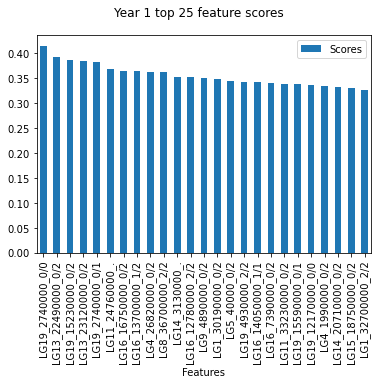

In [11]:
import pylab as pl

# print(reliefdict)
y1_relief_top=[]
score_list=[]
for value in fs1.top_features_[0:25]:
    score=fs1.feature_importances_[value]
    score_list.append(score)
    y1_relief_top.append(reliefdict1[score])
    
df = pd.DataFrame({'Features':y1_relief_top, 'Scores':score_list})
ax = df.plot.bar(x='Features', y='Scores', rot=90)
pl.suptitle("Year 1 top 25 feature scores")


print(y1_relief_top)

In [12]:
y1_relief_top

['LG19_2740000_0/0',
 'LG13_22490000_0/2',
 'LG19_15230000_0/2',
 'LG13_23120000_0/2',
 'LG19_2740000_0/1',
 'LG11_24760000_.',
 'LG16_16750000_0/2',
 'LG16_13700000_1/2',
 'LG4_26820000_0/2',
 'LG8_36700000_2/2',
 'LG14_3130000_.',
 'LG16_12780000_2/2',
 'LG9_4890000_0/2',
 'LG1_30190000_0/2',
 'LG5_40000_0/2',
 'LG19_4930000_2/2',
 'LG16_14050000_1/1',
 'LG16_7390000_0/2',
 'LG11_33230000_0/2',
 'LG19_15590000_0/1',
 'LG19_12170000_0/0',
 'LG4_1990000_0/2',
 'LG14_20710000_0/2',
 'LG15_18750000_0/2',
 'LG1_32700000_2/2']

## Get prediction year 1

In [13]:
def predict(value):
    y1_relief_top=[]
    for value in fs1.top_features_[0:value]:
        score=fs1.feature_importances_[value]
        y1_relief_top.append(reliefdict1[score])

    x=binned_y1[y1_relief_top]
    y = binned_y1.fork_length
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=2)

    print("--- Classifiers with TuRF Relief-F top",str(len(y1_relief_top)), "features and year 1 data ---\n")
    classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    print("KNN", accuracy_score(y_test, y_pred))


    classifier = GaussianNB()
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    print("Naive Bayes", accuracy_score(y_test, y_pred))

    clf = LogisticRegression(random_state=0, max_iter=2000).fit(x_train, y_train)
    pred = clf.predict(x_test)
    print("Logistic regression", accuracy_score(y_test, pred))

    ranfor = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 5, max_depth = 200)
    ranfor.fit(x_train, y_train)
    pred_ranfor = ranfor.predict(x_test)
    print("Random forest", accuracy_score(y_test, pred_ranfor))
    pred_ranfor

    sv = svm.SVC(kernel='linear')
    sv.fit(x_train, y_train)
    pred_svm = sv.predict(x_test)
    print("SVM",accuracy_score(y_test, pred_svm))

def main():
    nofeatures=[25, 50, 100, 200, 500]
    for value in nofeatures:
        predict(value)
main()

--- Classifiers with TuRF Relief-F top 25 features and year 1 data ---

KNN 0.625
Naive Bayes 0.9375
Logistic regression 0.75
Random forest 0.875
SVM 0.75
--- Classifiers with TuRF Relief-F top 50 features and year 1 data ---

KNN 0.6875
Naive Bayes 0.8125
Logistic regression 0.8125
Random forest 0.875
SVM 0.75
--- Classifiers with TuRF Relief-F top 100 features and year 1 data ---

KNN 0.6875
Naive Bayes 0.6875
Logistic regression 0.6875
Random forest 0.75
SVM 0.75
--- Classifiers with TuRF Relief-F top 200 features and year 1 data ---

KNN 0.625
Naive Bayes 0.5
Logistic regression 0.6875
Random forest 0.8125
SVM 0.6875
--- Classifiers with TuRF Relief-F top 500 features and year 1 data ---

KNN 0.4375
Naive Bayes 0.5
Logistic regression 0.75
Random forest 0.875
SVM 0.8125


## Now do year 3

In [14]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from skrebate.turf import TuRF
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
binned_y3['sex'] = pd.factorize(binned_y3.sex)[0]
binned_y3['population'] = pd.factorize(binned_y3.population)[0]
genetic_data=binned_y3
features, labels = genetic_data.drop('fork_length', axis=1).values, genetic_data['fork_length'].values
headers = list(genetic_data.drop("fork_length", axis=1))
fs3 = TuRF(core_algorithm="ReliefF", n_features_to_select=2, pct=0.5,verbose=True)
fs3.fit(features, labels, headers)
reliefdict3={}
for feature_name, feature_score in zip(genetic_data.drop('fork_length', axis=1).columns, fs3.feature_importances_):
    reliefdict3[feature_score]=feature_name

Created distance array in 25.417914152145386 seconds.
Feature scoring under way ...
Completed scoring in 2486.6798934936523 seconds.
Created distance array in 11.523096561431885 seconds.
Feature scoring under way ...
Completed scoring in 1117.8391366004944 seconds.
Created distance array in 4.8740410804748535 seconds.
Feature scoring under way ...
Completed scoring in 521.6339609622955 seconds.


## Get top 25 year 3

['LG1_28470000_1/2', 'LG15_8370000_2/2', 'LG20_14060000_0/1', 'LG11_15230000_.', 'LG2_25550000_0/2', 'LG6_3060000_2/2', 'LG16_10020000_0/2', 'LG10_5860000_0/2', 'LG12_9580000_0/2', 'LG20_14060000_0/0', 'LG14_3470000_2/2', 'LG1_22660000_0/2', 'LG1_30470000_0/2', 'LG22_6580000_.', 'LG8_31050000_.', 'LG15_15000000_0/0', 'LG21_9310000_0/2', 'LG1_4150000_0/2', 'LG15_12330000_0/2', 'LG10_80000_1/2', 'LG8_36700000_2/2', 'LG22_6390000_0/2', 'LG14_5830000_1/2', 'LG3_23690000_.', 'LG15_17570000_2/2']


Text(0.5, 0.98, 'Year 3 top 25 feature scores')

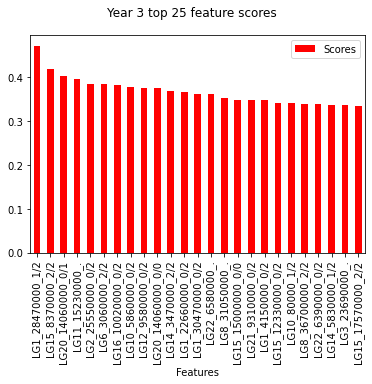

In [15]:
import pylab as pl

# print(reliefdict)
y3_relief_top=[]
score_list=[]
for value in fs3.top_features_[0:25]:
    score=fs3.feature_importances_[value]
    y3_relief_top.append(reliefdict3[score])
    score_list.append(score)
    
print(y3_relief_top)

df = pd.DataFrame({'Features':y3_relief_top, 'Scores':score_list})
ax = df.plot.bar(x='Features', y='Scores', rot=90, color='red')
pl.suptitle("Year 3 top 25 feature scores")

## Get prediction year 3

In [16]:
def pred(value):
    y3_relief_top=[]
    for value in fs3.top_features_[0:value]:
        score=fs3.feature_importances_[value]
        y3_relief_top.append(reliefdict3[score])
    x=binned_y3[y3_relief_top]
    y = binned_y3.fork_length
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=2)

    print("--- Classifiers with TuRF Relief-F top",str(len(y3_relief_top)), "features and year 3 data ---\n")
    classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    print("KNN", accuracy_score(y_test, y_pred))

    classifier = GaussianNB()
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    print("Naive Bayes", accuracy_score(y_test, y_pred))

    clf = LogisticRegression(random_state=0,max_iter=2000).fit(x_train, y_train)
    pred = clf.predict(x_test)
    print("Logistic regression", accuracy_score(y_test, pred))

    ranfor = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 5, max_depth = 200)
    ranfor.fit(x_train, y_train)
    pred_ranfor = ranfor.predict(x_test)
    print("Random forest", accuracy_score(y_test, pred_ranfor))
    pred_ranfor

    sv = svm.SVC(kernel='linear')
    sv.fit(x_train, y_train)
    pred_svm = sv.predict(x_test)
    print("SVM",accuracy_score(y_test, pred_svm))
def main():
    nofeatures=[25, 50, 100, 200, 500]
    for value in nofeatures:
        pred(value)
main()

--- Classifiers with TuRF Relief-F top 25 features and year 3 data ---

KNN 0.75
Naive Bayes 0.75
Logistic regression 0.75
Random forest 0.9375
SVM 0.6875
--- Classifiers with TuRF Relief-F top 50 features and year 3 data ---

KNN 0.6875
Naive Bayes 0.8125
Logistic regression 0.6875
Random forest 0.875
SVM 0.75
--- Classifiers with TuRF Relief-F top 100 features and year 3 data ---

KNN 0.75
Naive Bayes 0.8125
Logistic regression 0.75
Random forest 0.9375
SVM 0.875
--- Classifiers with TuRF Relief-F top 200 features and year 3 data ---

KNN 0.9375
Naive Bayes 0.9375
Logistic regression 0.875
Random forest 0.9375
SVM 0.875
--- Classifiers with TuRF Relief-F top 500 features and year 3 data ---

KNN 1.0
Naive Bayes 0.6875
Logistic regression 1.0
Random forest 0.9375
SVM 0.9375


# Year 1 chi-square feature selection and prediction

In [17]:
binned_y1['sex'] = pd.factorize(binned_y1.sex)[0]
binned_y1['population'] = pd.factorize(binned_y1.population)[0]
y = binned_y1.fork_length
X = binned_y1.drop(columns=["fork_length"])
bestfeatures = SelectKBest(score_func=chi2, k=10)
bestfeatures
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
varc1=str(featureScores.nlargest(26,'Score'))
varc1.split()
data_listc1=[]
for values in varc1.split():
    if "LG" in values:
        data_listc1.append(values)
x=X[data_listc1]
y = binned_y1.fork_length
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=2)


print("--- Classifiers with chi-square top",str(len(data_listc1)), "features and year 1 data ---\n")
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("KNN", accuracy_score(y_test, y_pred))


classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Naive Bayes", accuracy_score(y_test, y_pred))

clf = LogisticRegression(random_state=0,max_iter=2000).fit(x_train, y_train)
pred = clf.predict(x_test)
print("Logistic regression", accuracy_score(y_test, pred))

ranfor = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 5, max_depth = 200)
ranfor.fit(x_train, y_train)
pred_ranfor = ranfor.predict(x_test)
print("Random forest", accuracy_score(y_test, pred_ranfor))
pred_ranfor

sv = svm.SVC(kernel='linear')
sv.fit(x_train, y_train)
pred_svm = sv.predict(x_test)
print("SVM",accuracy_score(y_test, pred_svm))

--- Classifiers with chi-square top 25 features and year 1 data ---

KNN 0.4375
Naive Bayes 0.5
Logistic regression 0.75
Random forest 0.4375
SVM 0.625


# Year 3 chi-square feature selection and prediction

In [18]:
binned_y3['sex'] = pd.factorize(binned_y3.sex)[0]
binned_y3['population'] = pd.factorize(binned_y3.population)[0]
y = binned_y3.fork_length
X = binned_y3.drop(columns=["fork_length"])
bestfeatures = SelectKBest(score_func=chi2, k=10)
bestfeatures
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
varc3=str(featureScores.nlargest(26,'Score'))
varc3.split()
data_listc3=[]
for values in varc3.split():
    if "LG" in values:
        data_listc3.append(values)
x=X[data_listc3]
y = binned_y3.fork_length
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=2)


print("--- Classifiers with chi-square top",str(len(data_listc3)), "features and year 3 data ---\n")
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("KNN", accuracy_score(y_test, y_pred))


classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Naive Bayes", accuracy_score(y_test, y_pred))

clf = LogisticRegression(random_state=0,max_iter=2000).fit(x_train, y_train)
pred = clf.predict(x_test)
print("Logistic regression", accuracy_score(y_test, pred))

ranfor = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 5, max_depth = 200)
ranfor.fit(x_train, y_train)
pred_ranfor = ranfor.predict(x_test)
print("Random forest", accuracy_score(y_test, pred_ranfor))
pred_ranfor

sv = svm.SVC(kernel='linear')
sv.fit(x_train, y_train)
pred_svm = sv.predict(x_test)
print("SVM",accuracy_score(y_test, pred_svm))

--- Classifiers with chi-square top 25 features and year 3 data ---

KNN 0.5
Naive Bayes 0.5625
Logistic regression 0.375
Random forest 0.5
SVM 0.4375


# Mutual information year 3

In [19]:
binned_y3['sex'] = pd.factorize(binned_y3.sex)[0]
binned_y3['population'] = pd.factorize(binned_y3.population)[0]
y = binned_y3.fork_length
X = binned_y3.drop(columns=["fork_length"])
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=10)
bestfeatures
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
varm3=str(featureScores.nlargest(26,'Score'))
varm3.split()
data_listm3=[]
for values in varm3.split():
    if "LG" in values:
        data_listm3.append(values)
x=X[data_listm3]
y = binned_y3.fork_length
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=2)


print("--- Classifiers with chi-square top",str(len(data_listm3)), "features and year 3 data ---\n")
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("KNN", accuracy_score(y_test, y_pred))


classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Naive Bayes", accuracy_score(y_test, y_pred))

clf = LogisticRegression(random_state=0,max_iter=2000).fit(x_train, y_train)
pred = clf.predict(x_test)
print("Logistic regression", accuracy_score(y_test, pred))

ranfor = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 5, max_depth = 200)
ranfor.fit(x_train, y_train)
pred_ranfor = ranfor.predict(x_test)
print("Random forest", accuracy_score(y_test, pred_ranfor))
pred_ranfor

sv = svm.SVC(kernel='linear')
sv.fit(x_train, y_train)
pred_svm = sv.predict(x_test)
print("SVM",accuracy_score(y_test, pred_svm))

KeyboardInterrupt: 

# Mutual information year 1

In [ ]:
binned_y1['sex'] = pd.factorize(binned_y1.sex)[0]
binned_y1['population'] = pd.factorize(binned_y1.population)[0]
y = binned_y3.fork_length
X = binned_y3.drop(columns=["fork_length"])
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=10)
bestfeatures
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
varm1=str(featureScores.nlargest(26,'Score'))
varm1.split()
data_listm1=[]
for values in varm1.split():
    if "LG" in values:
        data_listm1.append(values)
x=X[data_listm1]
y = binned_y3.fork_length
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=2)


print("--- Classifiers with chi-square top",str(len(data_listm1)), "features and year 3 data ---\n")
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("KNN", accuracy_score(y_test, y_pred))


classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Naive Bayes", accuracy_score(y_test, y_pred))

clf = LogisticRegression(random_state=0,max_iter=2000).fit(x_train, y_train)
pred = clf.predict(x_test)
print("Logistic regression", accuracy_score(y_test, pred))

ranfor = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 5, max_depth = 200)
ranfor.fit(x_train, y_train)
pred_ranfor = ranfor.predict(x_test)
print("Random forest", accuracy_score(y_test, pred_ranfor))
pred_ranfor

sv = svm.SVC(kernel='linear')
sv.fit(x_train, y_train)
pred_svm = sv.predict(x_test)
print("SVM",accuracy_score(y_test, pred_svm))

In [ ]:
combined_list= [data_listc1, data_listc3, data_listm1, data_listm3, y1_relief_top, y3_relief_top]
combined_list_names= ["data_listc1", "data_listc3", "data_listm1", "data_listm3", "y1_relief_top", "y3_relief_top"]
count_list=[]

iterator=0
for separate_list in combined_list:
    for value in separate_list:
        for i in range(len(combined_list)-iterator):
            for list_against in combined_list[len(combined_list)-1-i]:
                if value in list_against:
                    if combined_list_names[iterator] != combined_list_names[len(combined_list)-1-i]:
                        print(value, combined_list_names[iterator], combined_list_names[len(combined_list)-1-i] )
    iterator+=1